In [53]:
import pandas as pd
from matplotlib import pyplot as plt
# pip install seaborn / conda install seaborn
import seaborn as sns
import numpy as np

### Для аналізу візмемо відомий нам датасет телеком оператора

In [54]:
df = pd.read_csv('../Data/telecom_churn.csv')

In [55]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [57]:
df.shape

(3333, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


**Slight preprocessing**

### Оскільки з "коробки" дерева рішень вимагають тільки числові фітчі, зробимо перетворення

In [58]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [59]:
df['Churn'] = df['Churn'].astype('int')

In [60]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Save states as a Series and drop for now from the DataFrame**

Фітчу State приберемо, оскільки вона категоріальна і в даному прикладі для нас неважлива

In [61]:
states = df.pop('State')

**Split the DataFrame into a matrix `X` and vector `y` which form the trainin set**

Створимо датасет Х (тільки фітчі) та стовпчик таргет - y окремо

In [62]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [63]:
X.shape, y.shape

((3333, 18), (3333,))

### Для побудови та валідації моделей ми будемо використовувати наступні кроки:
- розділимо датасет на трейн (якій будемо використовувати для навчання моделі)
- та тест (якій будемо використовувати для валідації - перевірки нашої моделі)

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_holdout,  y_train, y_holdout = \
    train_test_split(X, y, test_size=.3, random_state=17)

In [16]:
X_train.shape, X_holdout.shape

((2333, 18), (1000, 18))

### Побудуємо нашу першу модель
#### Для цього необхідно зробити всього три кроки:
- створити об'єкт: tree = DecisionTreeClassifier(random_state=17)
- навчити модель викоритовуючи метод .fit: tree.fit(X_train, y_train)  навчаємо на трейн даних
- зробити предикт на тест даних використовуючи метод .predict: tree.predict(X_holdout)
- порівняти реальний тартет з предиктом та порахувати метрику наприклад долю вірних відповідей: accuracy_score(pred_holdout,y_holdout)

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree = DecisionTreeClassifier(random_state=17)

"fit-predict"

In [70]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
pred_holdout=tree.predict(X_holdout)

In [75]:
pred_holdout.shape, y_holdout.shape

((1000,), (1000,))

In [76]:
accuracy_score(pred_holdout,y_holdout)

0.921

### Ми отримали accuracy_score 0.921 погано це чи гарно?
- відповідь на це питанння дасть баланс класів нашого таргету
- як ми бачимо, у нас класи не збалансовані але 0.921 краще ніж безлайн 0.867 (якщо ми будемо завжди передбачати 0) 

In [84]:
y.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [85]:
y_holdout.value_counts(normalize=True)

0    0.867
1    0.133
Name: Churn, dtype: float64

### Більш правильним підходом при валідації моделі є кросс-валідація, оскільки вона дає більш стабільні оцінки, особливо її застосовують при підборі гіперпараметрів моделі, оскільки це запобігає перенавчанню

In [86]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [87]:
from tqdm import tqdm_notebook

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [88]:
cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf).mean()

0.9078429570539743

### Давайте спробуємо порахувати accuracy в залежності від гіперпараметру - глибина дерева max_depth

In [119]:
cv_accuracies_by_depth, ho_accuracies_by_depth = [], []

max_depth_values = np.arange(1, 30)

# for each value of max depth 
for curr_max_depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state=17, max_depth=curr_max_depth)

    # perform cross-validation
    val_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(val_scores.mean())
    
    # assess the model with the holdout set
    tree.fit(X_train, y_train)
    
    cuur_ho_pred = tree.predict(X_holdout)
    
    ho_accuracies_by_depth.append(accuracy_score(y_holdout, cuur_ho_pred))

### Як ми бачимо,що сильно глибокі дерева призводять до перенавчання, оптімальним є значення глибини 5-7. Менше 5 глибина призводить до того, що алгоритм слабкий 

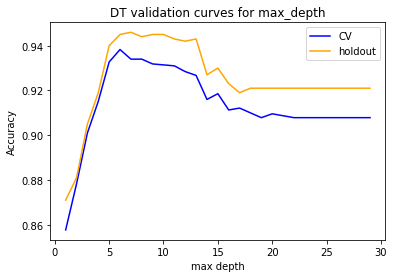

In [120]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label='CV', c='blue')
plt.plot(max_depth_values, ho_accuracies_by_depth, label='holdout', c='orange')
plt.legend();
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('DT validation curves for max_depth');

### Підбор параметрів краще робити за допомогою відповідного класу GridSearchCV, якій здійснює перебір всіх параметрів, які ви вкажете та обере накращі гіперпараметри використовуючи кросс-валідацію за метрикою (наприклад accuracy )

In [95]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [96]:
params = {'max_depth': np.arange(2, 11), 'min_samples_leaf':  np.arange(1, 11)}

In [97]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [99]:
best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1,
                        verbose=1)

In [100]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=49, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

#### Найкращі гіперпараметри

In [101]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

#### Найкраща модель

In [102]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

**Cross-Validation assessment of model quality**

#### Найкращий скор

In [103]:
best_tree.best_score_

0.9417059579939991

**Holdout assessment**

### перевіримо на holdout

In [39]:
pred_holdout_better = best_tree.predict(X_holdout)

In [40]:
accuracy_score(y_holdout, pred_holdout_better)

0.947

### Для кращого розуміння, як працює алгоритм необхідно зробити візуалізацію дерева, для цього викоритаємо graphviz

- для інсталяції graphviz в терміналі зробіть: sudo apt-get install graphviz
- або тут в юпітері в окремому рядку !sudo apt-get install graphviz

In [105]:
from sklearn.tree import export_graphviz

In [106]:
export_graphviz(decision_tree=best_tree.best_estimator_,
               out_file='tree.dot', filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)

### Результат нижче можна скопіювати та зробити візуалізацію дерева користуючись http://www.webgraphviz.com/ 

In [43]:
!cat tree.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#e58139d2"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e58139dd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e58139e9"] ;
1 -> 2 ;
3 [label="Total day charge <= 38.185\ngini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e58139f1"] ;
2 -> 3 ;
4 [label="Account length <= 224.5\ngini = 0.056\nsamples = 1570\nvalue = [1525, 45]", fillcolor="#e58139f7"] ;
3 -> 4 ;
5 [label="Total eve charge <= 27.965\ngini = 0.055\nsamples = 1568\nvalue = [1524, 44]", fillcolor="#e58139f8"] ;
4 -> 5 ;
6 [label="gini = 0.052\nsamples = 1560\nvalue = [1518, 42]", fillcolor="#e58139f8"] ;
5 -> 6 ;
7 [label="gini = 0.375\nsamples = 8\nvalue = [6, 2]", f

### Оскільки дерево вище завелике для відображення, зробимо дерево глибиною 3 та покажемо його

In [107]:
tree = DecisionTreeClassifier(random_state=17, max_depth=3).fit(X_train, y_train)

In [108]:
export_graphviz(decision_tree=tree,
               out_file='tree_depth3.dot', filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)

In [109]:
!cat tree_depth3.dot

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="Total day minutes <= 264.45\ngini = 0.255\nsamples = 2333\nvalue = [1983, 350]", fillcolor="#e58139d2"] ;
1 [label="Customer service calls <= 3.5\ngini = 0.206\nsamples = 2182\nvalue = [1927, 255]", fillcolor="#e58139dd"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="International plan <= 0.5\ngini = 0.149\nsamples = 2004\nvalue = [1842, 162]", fillcolor="#e58139e9"] ;
1 -> 2 ;
3 [label="gini = 0.096\nsamples = 1828\nvalue = [1736, 92]", fillcolor="#e58139f1"] ;
2 -> 3 ;
4 [label="gini = 0.479\nsamples = 176\nvalue = [106, 70]", fillcolor="#e5813957"] ;
2 -> 4 ;
5 [label="Total day charge <= 27.185\ngini = 0.499\nsamples = 178\nvalue = [85, 93]", fillcolor="#399de516"] ;
1 -> 5 ;
6 [label="gini = 0.209\nsamples = 76\nvalue = [9, 67]", fillcolor="#399de5dd"] ;
5 -> 6 ;
7 [label="gini = 0.38\nsamples = 102\nvalue = [76, 26]", fillcolor="#e58139a8"] ;
5 -> 7 ;
8 [label="Voice mail plan <

### Також можна відобразити дерево безпосереньо в юпітер тетрадці, для цього становіть необхідні бібілотеки

#### !pip install pydotplus
#### або в терміналі: pip install pydotplus 

In [110]:
from io import StringIO
import pydotplus
from ipywidgets import Image

In [111]:
dot_data = StringIO()
export_graphviz(decision_tree=tree,
               out_file=dot_data, filled=True, 
                feature_names=df.drop('Churn', axis=1).columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x03\x00\x00\x01\xf1\x08\x02\x00\x00\x00V0=\x0c\x…

### Хто дочитав той молодець